#### Download Assets

In [24]:
urls = ["https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/bb29f06b207f8ec7f7c49c9e13f4115da8db2669/assets/runway.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/emma_salt_pepper.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/highlights_and_shadows.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/776ac4a3970e6f3b577c2b457b9685780bea60ae/assets/looking_out.jpg",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/im02.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/im03.png",
        "https://github.com/ravindusenavirathna/Intensity-Transformations-and-Neighborhood-Filtering/blob/5a6279293d1b58b0067630303a25a589d0c2a131/assets/a1q5images/taylor.jpg"]

for url in urls:
    print(f"Downloading from: {url.split('/')[-1]}")
    raw_url = url.replace("github.com", "raw.githubusercontent.com").replace("/blob/", "/")
    !wget -q {raw_url} -O {raw_url.split("/")[-1]}

print("\nDownloaded files:")
!ls *.jpg *.png


Downloaded files:
emma_salt_pepper.jpg	    im02.png  looking_out.jpg  taylor.jpg
highlights_and_shadows.jpg  im03.png  runway.png


#### Import Libraries

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Question 01

In [5]:
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)
r = img / 255.0

In [6]:
gamma_a = 0.5
s_a = np.power(r, gamma_a)
img_gamma_05 = np.uint8(np.clip(s_a * 255, 0, 255))

In [7]:
gamma_b = 2.0
s_b = np.power(r, gamma_b)
img_gamma_2 = np.uint8(np.clip(s_b * 255, 0, 255))

In [8]:
r1 = 0.2
r2 = 0.8

s_c = np.zeros_like(r)

# r < r1 -> 0 (Already 0 from initialization)

# r1 <= r <= r2 -> (r - r1) / (r2 - r1)
mask_middle = (r >= r1) & (r <= r2)
s_c[mask_middle] = (r[mask_middle] - r1) / (r2 - r1)

# r > r2 -> 1
mask_upper = (r > r2)
s_c[mask_upper] = 1.0

img_contrast = np.uint8(np.clip(s_c * 255, 0, 255))

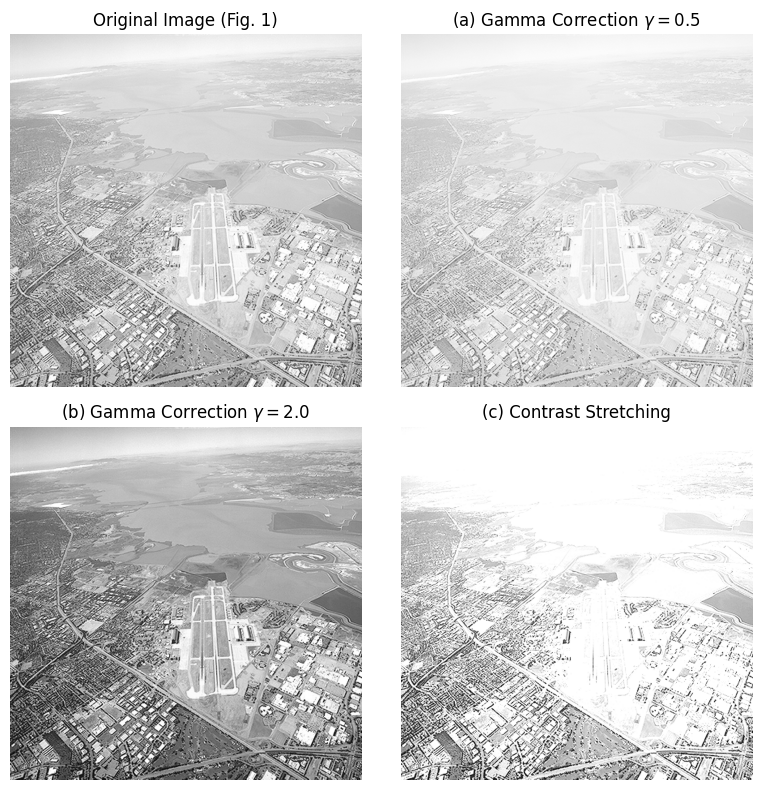

In [10]:
plt.figure(figsize=(8, 8))

# Original
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image (Fig. 1)')
plt.axis('off')

# Gamma = 0.5
plt.subplot(2, 2, 2)
plt.imshow(img_gamma_05, cmap='gray', vmin=0, vmax=255)
plt.title(r'(a) Gamma Correction $\gamma=0.5$')
plt.axis('off')

# Gamma = 2.0
plt.subplot(2, 2, 3)
plt.imshow(img_gamma_2, cmap='gray', vmin=0, vmax=255)
plt.title(r'(b) Gamma Correction $\gamma=2.0$')
plt.axis('off')

# Contrast Stretching
plt.subplot(2, 2, 4)
plt.imshow(img_contrast, cmap='gray', vmin=0, vmax=255)
plt.title('(c) Contrast Stretching')
plt.axis('off')

plt.tight_layout()

plt.show()

# Question 02

In [11]:
gamma_value = 0.5

img_bgr = cv2.imread('highlights_and_shadows.jpg')
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

l_channel, a_channel, b_channel = cv2.split(img_lab)

l_norm = l_channel / 255.0
l_corrected_norm = np.power(l_norm, gamma_value)
l_new = np.uint8(np.clip(l_corrected_norm * 255, 0, 255))

img_lab_corrected = cv2.merge((l_new, a_channel, b_channel))

img_corrected_bgr = cv2.cvtColor(img_lab_corrected, cv2.COLOR_LAB2BGR)
img_corrected_rgb = cv2.cvtColor(img_corrected_bgr, cv2.COLOR_BGR2RGB)
img_original_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

hist_original = cv2.calcHist([l_channel], [0], None, [256], [0, 256])
hist_corrected = cv2.calcHist([l_new], [0], None, [256], [0, 256])

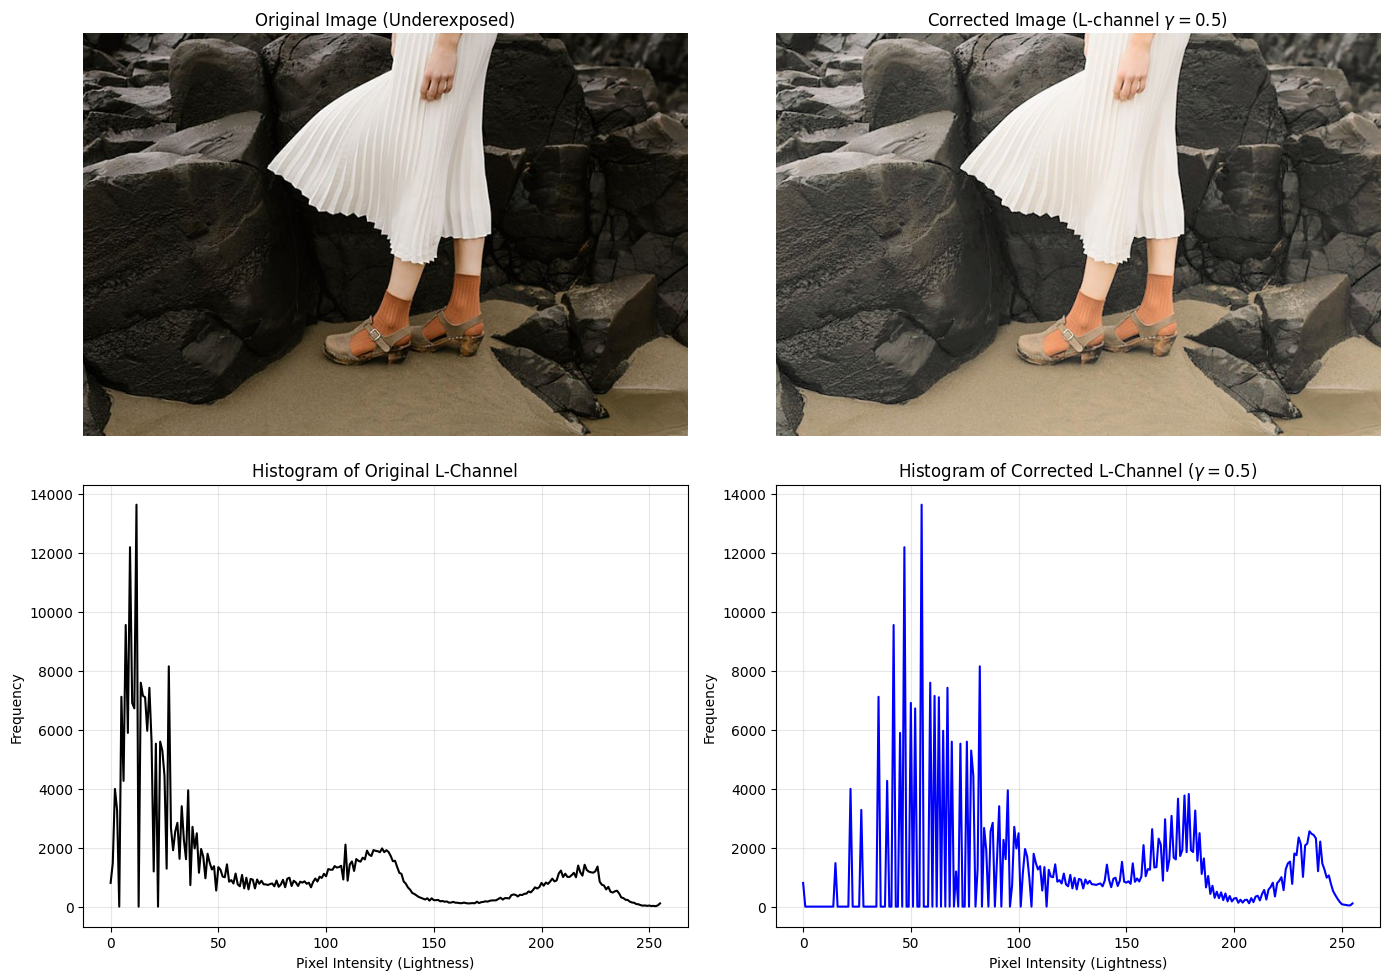

In [12]:
plt.figure(figsize=(14, 10))

# Original
plt.subplot(2, 2, 1)
plt.imshow(img_original_rgb)
plt.title('Original Image (Underexposed)')
plt.axis('off')

# Corrected
plt.subplot(2, 2, 2)
plt.imshow(img_corrected_rgb)
plt.title(rf'Corrected Image (L-channel $\gamma={gamma_value}$)')
plt.axis('off')

# Histogram: Original
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='black')
plt.title('Histogram of Original L-Channel')
plt.xlabel('Pixel Intensity (Lightness)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Histogram: Corrected
plt.subplot(2, 2, 4)
plt.plot(hist_corrected, color='blue')
plt.title(rf'Histogram of Corrected L-Channel ($\gamma={gamma_value}$)')
plt.xlabel('Pixel Intensity (Lightness)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# Question 03

In [13]:
img = cv2.imread('runway.png', cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

cdf = hist.cumsum()
cdf_normalized = (cdf * 255) / cdf.max()
lookup_table = np.uint8(cdf_normalized)

img_equalized_manual = lookup_table[img]

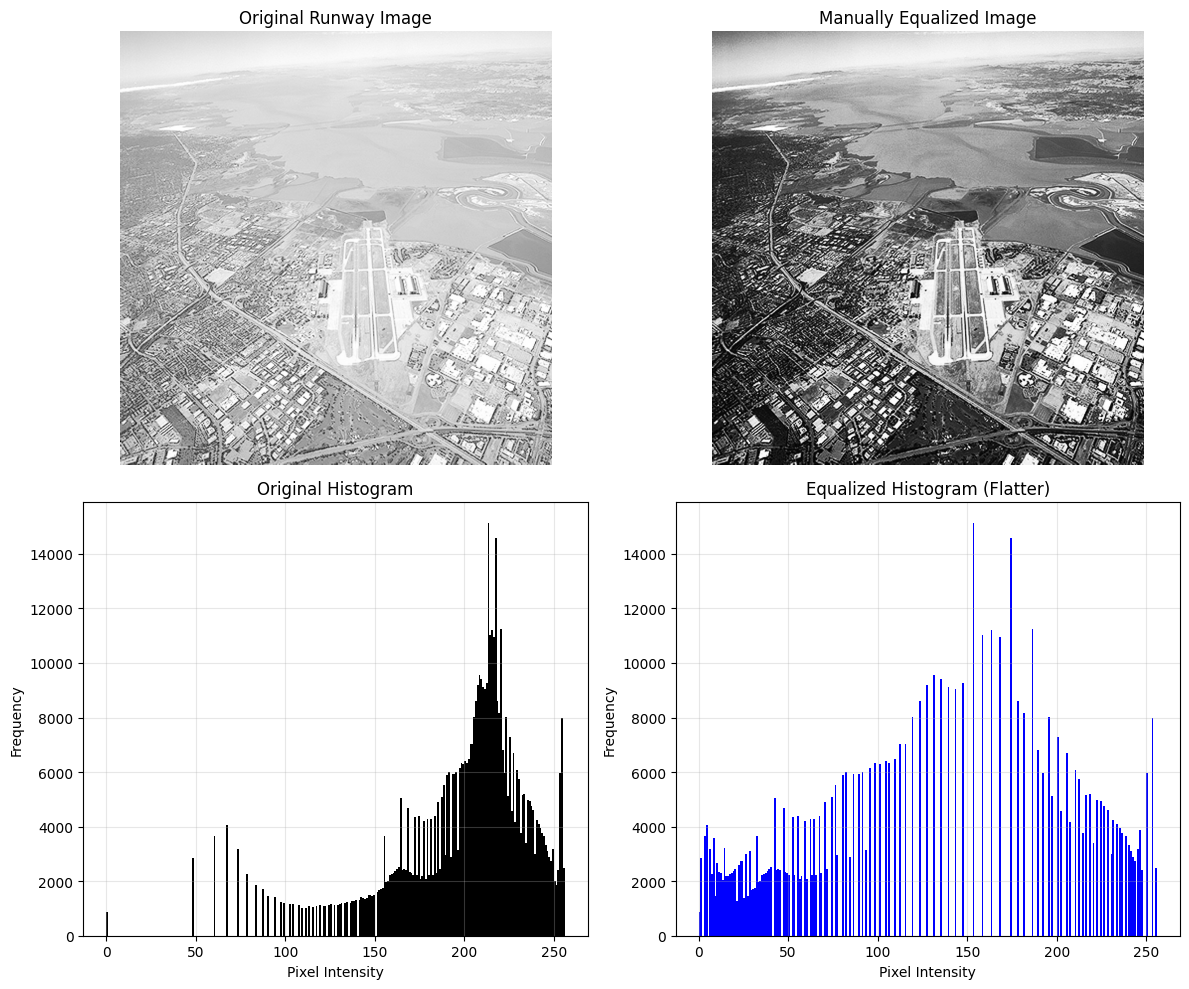

In [14]:
plt.figure(figsize=(12, 10))

# Original
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Runway Image')
plt.axis('off')

# Equalized Image (Manual)
plt.subplot(2, 2, 2)
plt.imshow(img_equalized_manual, cmap='gray', vmin=0, vmax=255)
plt.title('Manually Equalized Image')
plt.axis('off')

# Histogram: Original
plt.subplot(2, 2, 3)
plt.hist(img.flatten(), bins=256, range=[0, 256], color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Histogram: Equalized
plt.subplot(2, 2, 4)
plt.hist(img_equalized_manual.flatten(), bins=256, range=[0, 256], color='blue')
plt.title('Equalized Histogram (Flatter)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# Question 04

In [25]:
img = cv2.imread('looking_out.jpg', cv2.IMREAD_GRAYSCALE)

otsu_threshold, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(f"Otsu's calculated threshold value: {otsu_threshold}")

foreground_pixels = img[mask == 255]
hist, bins = np.histogram(foreground_pixels.flatten(), bins=256, range=[0, 256])
cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')


img_equalized = img.copy()
img_equalized[mask == 255] = cdf_final[img[mask == 255]]

Otsu's calculated threshold value: 101.0


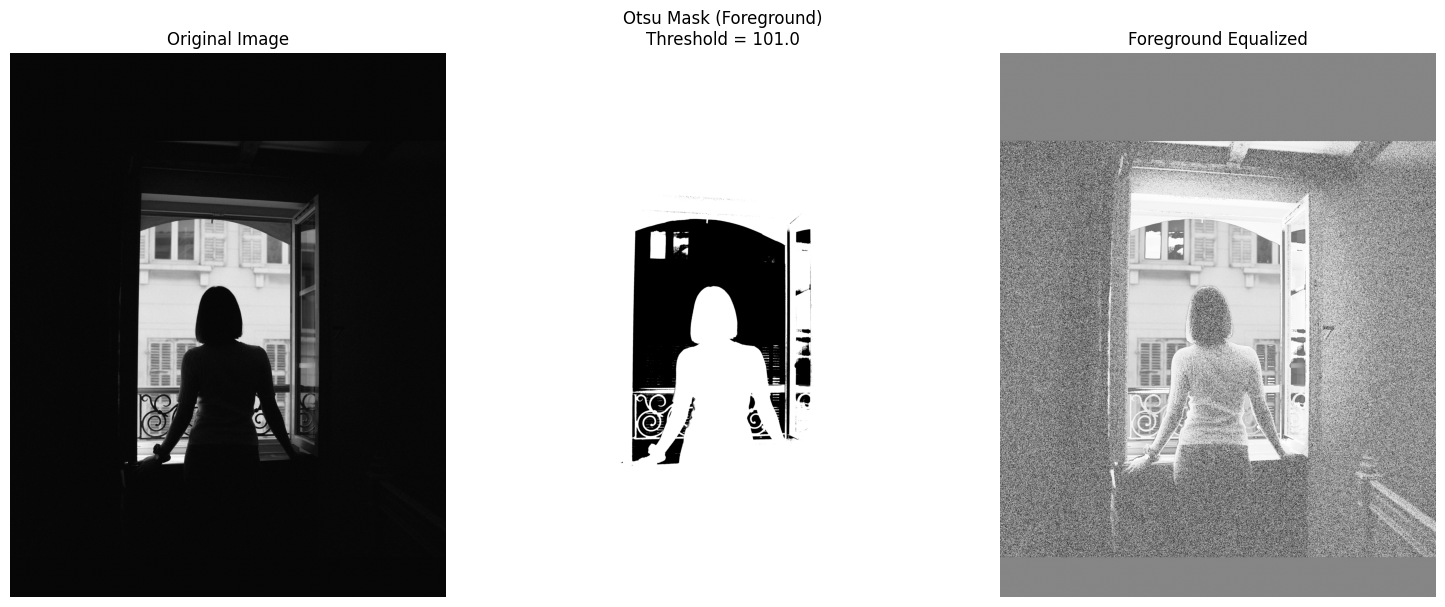

In [26]:
plt.figure(figsize=(15, 6))

# Original
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

# Binary Mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.title(f'Otsu Mask (Foreground)\nThreshold = {otsu_threshold}')
plt.axis('off')

# Result
plt.subplot(1, 3, 3)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.title('Foreground Equalized')
plt.axis('off')

plt.tight_layout()

plt.show()

# Question 05

In [ ]:
sigma = 2
kernel_size_small = 5
kernel_size_large = 51

In [28]:
ax = np.arange(-kernel_size_small // 2 + 1., kernel_size_small // 2 + 1.)
xx, yy = np.meshgrid(ax, ax)
kernel_raw = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
kernel_5x5 = kernel_raw / np.sum(kernel_raw)

print("Computed 5x5 Gaussian Kernel:\n")
print(np.round(kernel_5x5, 4))

Computed 5x5 Gaussian Kernel:

[[0.0232 0.0338 0.0383 0.0338 0.0232]
 [0.0338 0.0492 0.0558 0.0492 0.0338]
 [0.0383 0.0558 0.0632 0.0558 0.0383]
 [0.0338 0.0492 0.0558 0.0492 0.0338]
 [0.0232 0.0338 0.0383 0.0338 0.0232]]


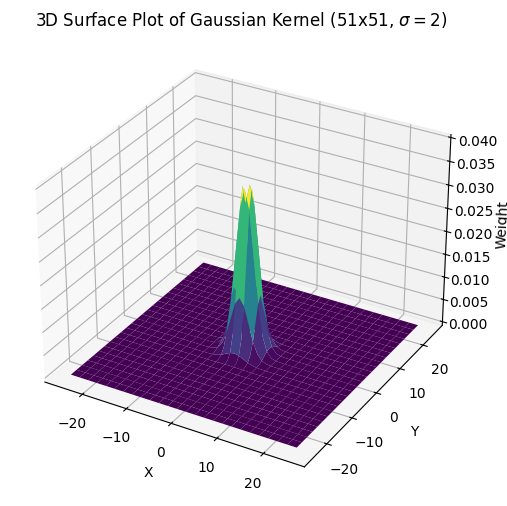

In [33]:
ax_large = np.arange(-kernel_size_large // 2 + 1., kernel_size_large // 2 + 1.)
xx_large, yy_large = np.meshgrid(ax_large, ax_large)
kernel_large_raw = np.exp(-(xx_large**2 + yy_large**2) / (2. * sigma**2))
kernel_large = kernel_large_raw / np.sum(kernel_large_raw)

fig = plt.figure(figsize=(10, 6))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(xx_large, yy_large, kernel_large, cmap='viridis')

ax3d.set_title(rf'3D Surface Plot of Gaussian Kernel (51x51, $\sigma={sigma}$)')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Weight')

plt.show()

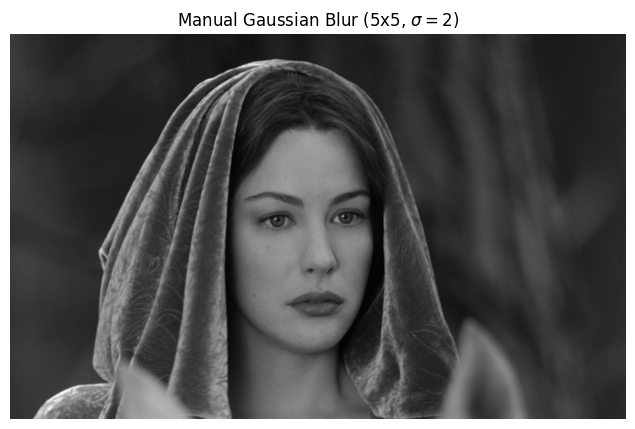

In [37]:
img = cv2.imread('im02.png', cv2.IMREAD_GRAYSCALE)
img_manual_smooth = cv2.filter2D(img, -1, kernel_5x5)

plt.figure(figsize=(15, 5))
plt.imshow(img_manual_smooth, cmap='gray')
plt.title(rf'Manual Gaussian Blur (5x5, $\sigma={sigma}$)')
plt.axis('off')

plt.show()

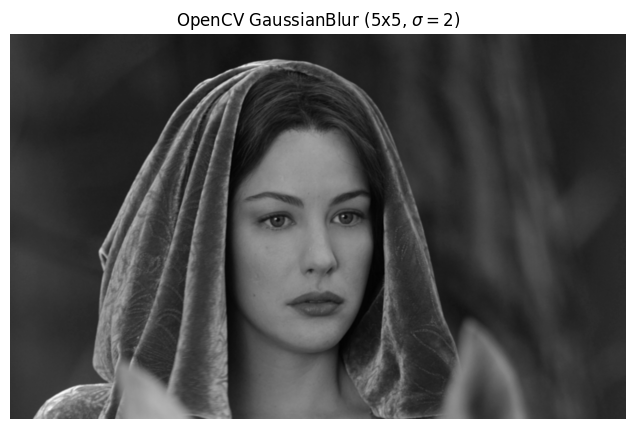

In [38]:
img_opencv_smooth = cv2.GaussianBlur(img, (kernel_size_small, kernel_size_small), sigma)

plt.figure(figsize=(15, 5))
plt.imshow(img_opencv_smooth, cmap='gray')
plt.title(rf'OpenCV GaussianBlur (5x5, $\sigma={sigma}$)')
plt.axis('off')

plt.show()

# Question 06

In [39]:
image_path = 'runway.jpg'
sigma = 2
k_size_small = 5
k_size_large = 51

In [ ]:
ax = np.arange(-k_size_small // 2 + 1., k_size_small // 2 + 1.)
xx, yy = np.meshgrid(ax, ax)

gaussian = (1 / (2 * np.pi * sigma**2)) * \
    np.exp(-(xx**2 + yy**2) / (2 * sigma**2))


Gx_kernel = -(xx / sigma**2) * gaussian
Gy_kernel = -(yy / sigma**2) * gaussian

print("5x5 Gx Kernel (Derivative in x):\n\n", np.round(Gx_kernel, 5))

5x5 Gx Kernel (Derivative in x):
 [[ 0.00732  0.00532 -0.      -0.00532 -0.00732]
 [ 0.01065  0.00775 -0.      -0.00775 -0.01065]
 [ 0.01207  0.00878 -0.      -0.00878 -0.01207]
 [ 0.01065  0.00775 -0.      -0.00775 -0.01065]
 [ 0.00732  0.00532 -0.      -0.00532 -0.00732]]


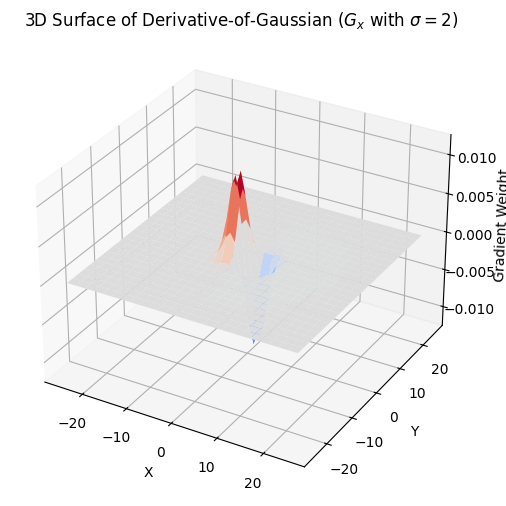

In [43]:
ax_large = np.arange(-k_size_large // 2 + 1., k_size_large // 2 + 1.)
xx_large, yy_large = np.meshgrid(ax_large, ax_large)

gauss_large = (1 / (2 * np.pi * sigma**2)) * \
    np.exp(-(xx_large**2 + yy_large**2) / (2 * sigma**2))
Gx_large = -(xx_large / sigma**2) * gauss_large

fig = plt.figure(figsize=(10, 6))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(xx_large, yy_large, Gx_large, cmap='coolwarm')
ax3d.set_title(rf'3D Surface of Derivative-of-Gaussian ($G_x$ with $\sigma={sigma}$)')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Gradient Weight')

plt.show()

In [ ]:




# ---------------------------------------------------------
# Part (d) & (e): Application and Comparison
# ---------------------------------------------------------
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# --- Part (d) Manual DoG Application ---
# Apply the 5x5 kernels computed in part (b)
# Output depth is CV_64F to handle negative gradients
grad_x_manual = cv2.filter2D(img, cv2.CV_64F, Gx_kernel)
grad_y_manual = cv2.filter2D(img, cv2.CV_64F, Gy_kernel)

    # Convert to absolute magnitude for viewing
abs_x_manual = cv2.convertScaleAbs(grad_x_manual)
abs_y_manual = cv2.convertScaleAbs(grad_y_manual)

    # --- Part (e) OpenCV Sobel Comparison ---
    # Sobel calculates gradients using a discrete 3x3 approximation
grad_x_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y_sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

abs_x_sobel = cv2.convertScaleAbs(grad_x_sobel)
abs_y_sobel = cv2.convertScaleAbs(grad_y_sobel)

    # Visualization
plt.figure(figsize=(14, 10))

    # Row 1: Manual DoG (sigma=2)
plt.subplot(2, 2, 1)
plt.imshow(abs_x_manual, cmap='gray')
plt.title(rf'Manual DoG X-Gradient ($\sigma={sigma}$)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(abs_y_manual, cmap='gray')
plt.title(rf'Manual DoG Y-Gradient ($\sigma={sigma}$)')
plt.axis('off')

    # Row 2: OpenCV Sobel
plt.subplot(2, 2, 3)
plt.imshow(abs_x_sobel, cmap='gray')
plt.title('OpenCV Sobel X-Gradient')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(abs_y_sobel, cmap='gray')
plt.title('OpenCV Sobel Y-Gradient')
plt.axis('off')

plt.tight_layout()
plt.savefig('solution_q6_comparison.png')
print("Comparison results saved to 'solution_q6_comparison.png'")

plt.show()

    # Comment on differences:
print("\nObservation:")
print("1. The Manual DoG result is blurrier/smoother.")
print(f"   Reason: We used sigma={sigma}, which corresponds to a wider smoothing")
print("   effect before differentiation. This suppresses noise but thickens edges.")
print("2. The Sobel result is sharper and noisier.")
print("   Reason: Sobel uses a small (3x3) kernel, effectively a much smaller sigma,")
print("   capturing finer details and noise.")

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1527: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'
